In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os

def rename_files(directory):
    # get file names
    files_and_dirs = os.listdir(directory)

    # drop folder
    files = [f for f in files_and_dirs if os.path.isfile(os.path.join(directory, f))]

    for file in files:
        new_name = file

        #  .3.6.1.4.1.14519.... to 1.3.6.1.4.1.14519....
        if file.startswith('.3.6.1.4.1.14519.'):
            new_name = '1.' + file[1:]

        # drop '_'
        if file.startswith('_'):
            new_name = file[1:]

        # rename file
        os.rename(os.path.join(directory, file), os.path.join(directory, new_name))
        # print(f"Renamed: {file} -> {new_name}")

directory_path = '/content/gdrive/MyDrive/unet-roi'

rename_files(directory_path)

In [ ]:
import os

def get_all_file_names(directory):

    files_and_dirs = os.listdir(directory)

    files = [f for f in files_and_dirs if os.path.isfile(os.path.join(directory, f))]

    for file in files:
        print(file)

    return files

directory_path = "/content/gdrive/MyDrive/unet-roi"

file_names = get_all_file_names(directory_path)

print(file_names)

1.3.6.1.4.1.14519.5.2.1.6279.6001.137375498893536422914241295628_1.jpg
1.3.6.1.4.1.14519.5.2.1.6279.6001.142485715518010940961688015191_1.jpg
1.3.6.1.4.1.14519.5.2.1.6279.6001.143412474064515942785157561636_2.jpg
1.3.6.1.4.1.14519.5.2.1.6279.6001.153536305742006952753134773630_2.jpg
3_1.3.6.1.4.1.14519.5.2.1.6279.6001.153536305742006952753134773630_2.jpg
3_1.3.6.1.4.1.14519.5.2.1.6279.6001.153536305742006952753134773630_1.jpg
0_1.3.6.1.4.1.14519.5.2.1.6279.6001.153536305742006952753134773630_1.jpg
1.3.6.1.4.1.14519.5.2.1.6279.6001.153536305742006952753134773630_1.jpg
1.3.6.1.4.1.14519.5.2.1.6279.6001.159996104466052855396410079250_1.jpg
1_1.3.6.1.4.1.14519.5.2.1.6279.6001.153536305742006952753134773630_1.jpg
2_1.3.6.1.4.1.14519.5.2.1.6279.6001.153536305742006952753134773630_1.jpg
1_1.3.6.1.4.1.14519.5.2.1.6279.6001.159996104466052855396410079250_1.jpg
2_1.3.6.1.4.1.14519.5.2.1.6279.6001.159996104466052855396410079250_1.jpg
1.3.6.1.4.1.14519.5.2.1.6279.6001.16390177317137394024782949238

In [ ]:
len(file_names)

917

In [ ]:
import pandas as pd
annotations_df = pd.read_csv("/content/gdrive/MyDrive/modified_luna22_label_processed1.csv")
annotations_df['Texture'] = annotations_df['Texture'].replace({1: 0, 2: 1, 3: 1, 4: 1, 5: 2})
print(annotations_df)

                                      SeriesInstanceUID  Texture  Malignancy  \
0     1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...        2           0   
1     1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...        2           1   
2     1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...        2           0   
3     1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028...        2           0   
4     1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408...        2           1   
...                                                 ...      ...         ...   
1144  1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...        2           0   
1145  1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...        2           0   
1146  1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...        0           0   
1147  1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...        2           1   
1148  1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...        2           0   

      Calcification      coordX      co

In [ ]:
import pandas as pd

df = annotations_df

new_df = pd.DataFrame(columns=['FileName', 'Texture', 'Malignancy', 'Calcification'])

for file_name in file_names:
    clean_file_name = file_name.split('_')[-2] + '_' + file_name.split('_')[-1]

    # match SeriesInstanceUID
    row = df[df['SeriesInstanceUID'].str.contains(clean_file_name.split('_')[0])]

    if not row.empty:
        # get annotations
        texture = row['Texture'].values[0]
        malignancy = row['Malignancy'].values[0]
        calcification = row['Calcification'].values[0]

        # add to new dataframe
        new_row = pd.DataFrame([{
            'FileName': file_name,
            'Texture': texture,
            'Malignancy': malignancy,
            'Calcification': calcification
        }])
        new_df = pd.concat([new_df, new_row], ignore_index=True)

print(new_df)

                                              FileName Texture Malignancy  \
0    1.3.6.1.4.1.14519.5.2.1.6279.6001.137375498893...       2          0   
1    1.3.6.1.4.1.14519.5.2.1.6279.6001.142485715518...       2          0   
2    1.3.6.1.4.1.14519.5.2.1.6279.6001.143412474064...       2          1   
3    1.3.6.1.4.1.14519.5.2.1.6279.6001.153536305742...       1          1   
4    3_1.3.6.1.4.1.14519.5.2.1.6279.6001.1535363057...       1          1   
..                                                 ...     ...        ...   
912  1.3.6.1.4.1.14519.5.2.1.6279.6001.124663713663...       2          1   
913  1.3.6.1.4.1.14519.5.2.1.6279.6001.121391737347...       2          1   
914  1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982...       1          1   
915  1.3.6.1.4.1.14519.5.2.1.6279.6001.128881800399...       2          1   
916  1.3.6.1.4.1.14519.5.2.1.6279.6001.128881800399...       2          1   

    Calcification  
0               6  
1               6  
2              

In [ ]:
new_df

,FileName,Texture,Malignancy,Calcification
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.137375498893...,2,0,6
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.142485715518...,2,0,6
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.143412474064...,2,1,6
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.153536305742...,1,1,6
4,3_1.3.6.1.4.1.14519.5.2.1.6279.6001.1535363057...,1,1,6
...,...,...,...,...
912,1.3.6.1.4.1.14519.5.2.1.6279.6001.124663713663...,2,1,6
913,1.3.6.1.4.1.14519.5.2.1.6279.6001.121391737347...,2,1,6
914,1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982...,1,1,6
915,1.3.6.1.4.1.14519.5.2.1.6279.6001.128881800399...,2,1,6


This model can't converge

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
# larger CNN model
def create_larger_model():
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))  # add dropout layer to prevent over fitting
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))  # use sigmoid function beacuse of it's a binary classfication problem

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

larger_model = create_larger_model()
larger_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 29, 29, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,731,649 (10.42 MB)

 Trainable params: 2,731,649 (10.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import os
import pandas as pd

directory_path = "/content/gdrive/MyDrive/unet-roi/"

images = []
file_names_list = []

for file_name in file_names:
    file_path = os.path.join(directory_path, file_name)
    try:
        img = Image.open(file_path)

        img_array = np.array(img)
        images.append(img_array)

        file_names_list.append(file_name)
    except FileNotFoundError:
        print(f"File {file_path} not found. Skipping this file.")


images = np.array(images)


# Extract the Malignancy column as the prediction value and make sure the order is consistent with the image data
y = new_df.set_index('FileName').loc[file_names_list]['Malignancy'].values #or Texture

# Split training set and test set
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.2, random_state=42)

X_train = np.array(X_train, dtype=np.uint8)
X_test = np.array(X_test, dtype=np.uint8)
y_train = np.array(y_train, dtype=np.uint8)
y_test = np.array(y_test, dtype=np.uint8)

np.save('trainX.npy', X_train)
np.save('testX.npy', X_test)
np.save('trainY1.npy', y_train)
np.save('testY1.npy', y_test)

print("Images and Malignancy values have been saved to 'train.npy', 'test.npy', 'trainY.npy', and 'testY.npy'.")

Images and Malignancy values have been saved to 'train.npy', 'test.npy', 'trainY.npy', and 'testY.npy'.


In [ ]:
!mv /content/testX.npy /content/gdrive/MyDrive/model2
!mv /content/trainX.npy /content/gdrive/MyDrive/model2
!mv /content/testY1.npy /content/gdrive/MyDrive/model2
!mv /content/trainY1.npy /content/gdrive/MyDrive/model2

In [ ]:
X_test.shape

(184, 64, 64, 3)

In [ ]:
# X_test = (X_test-127.0)/127.0
# X_train = (X_train-127.0)/127.0
# X_test = np.reshape(X_test, (len(X_test), 64, 64, 3))
# X_train = np.reshape(X_train, (len(X_train), 64, 64, 3))

Benign and malignant classification

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

class ResNet2D(nn.Module):
    def __init__(self, num_classes_malignancy):
        super(ResNet2D, self).__init__()
        self.resnet = models.resnet18(pretrained=True)  # use resnet18 to Improve training speed
        self.resnet.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)  # input channel = 3
        self.resnet.fc = nn.Sequential(
            nn.Linear(self.resnet.fc.in_features, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes_malignancy)
        )

    def forward(self, x):
        # 调整输入形状
        x = x.permute(0, 3, 1, 2)  # 从 (num_samples, 64, 64, 3)

        x = self.resnet.conv1(x)
        x = self.resnet.bn1(x)
        x = self.resnet.relu(x)
        x = self.resnet.maxpool(x)

        x = self.resnet.layer1(x)
        x = self.resnet.layer2(x)
        x = self.resnet.layer3(x)
        x = self.resnet.layer4(x)

        x = self.resnet.avgpool(x)
        x = torch.flatten(x, 1)

        out_malignancy = self.resnet.fc(x)

        return out_malignancy


model = ResNet2D(num_classes_malignancy=2)


trainX = torch.tensor(X_train, dtype=torch.float32) # Dummy data for example
trainY = torch.tensor(y_train, dtype=torch.long) # Dummy data for example
# trainX = X_train
# trainY = y_train


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
#scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

loss_list = []
acc_list = []

num_epochs = 25
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(trainX)
    loss = criterion(outputs, trainY)

    loss.backward()
    optimizer.step()
    scheduler.step()
    _, predicted = torch.max(outputs.data, 1)
    accuracy = accuracy_score(trainY.numpy(), predicted.numpy())
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()},acc:{accuracy}')
    loss_list.append(loss.item())

    acc_list.append(accuracy)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/25], Loss: 0.6290794610977173,acc:0.694406548431105
Epoch [2/25], Loss: 0.5643650889396667,acc:0.7312414733969986
Epoch [3/25], Loss: 0.3676699101924896,acc:0.8581173260572987
Epoch [4/25], Loss: 0.26623842120170593,acc:0.9304229195088677
Epoch [5/25], Loss: 0.26588308811187744,acc:0.8963165075034106
Epoch [6/25], Loss: 0.09567965567111969,acc:0.990450204638472
Epoch [7/25], Loss: 0.07902809232473373,acc:0.990450204638472
Epoch [8/25], Loss: 0.03095858357846737,acc:0.9986357435197817
Epoch [9/25], Loss: 0.0179116353392601,acc:0.9972714870395635
Epoch [10/25], Loss: 0.010306294076144695,acc:1.0
Epoch [11/25], Loss: 0.0038482306990772486,acc:1.0
Epoch [12/25], Loss: 0.0037854351103305817,acc:1.0
Epoch [13/25], Loss: 0.0036321785300970078,acc:1.0
Epoch [14/25], Loss: 0.003173787146806717,acc:1.0
Epoch [15/25], Loss: 0.00291706551797688,acc:1.0
Epoch [16/25], Loss: 0.00251072458922863,acc:1.0
Epoch [17/25], Loss: 0.0026111402548849583,acc:1.0
Epoch [18/25], Loss: 0.002419701544567

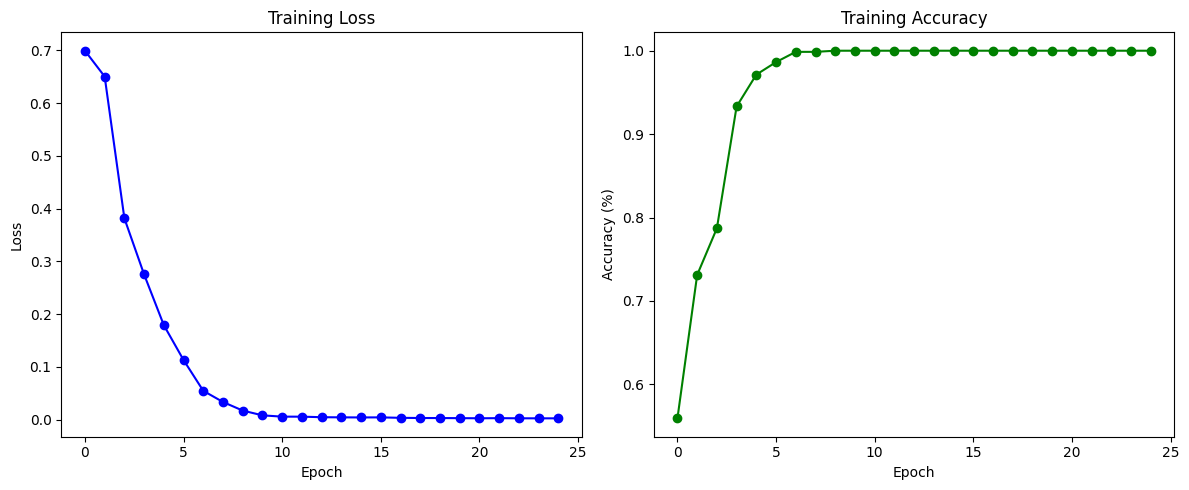

In [ ]:
import matplotlib.pyplot as plt

epochs = 25

accuracy_list = acc_list

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss_list, marker='o', color='b')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), accuracy_list, marker='o', color='g')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.tight_layout()
plt.show()

save model

In [ ]:
torch.save(model.state_dict(), 'resnet18_model.pth')

print("Model saved as 'resnet18_model.pth'")

Model saved as 'resnet18_model.pth'


In [ ]:
!mv /content/resnet18_model.pth /content/gdrive/MyDrive

ROC curve

In [ ]:
X_test.shape

torch.Size([184, 64, 64, 3])

<ipython-input-208-929f2447f3e4>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
<ipython-input-208-929f2447f3e4>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.long)


Accuracy: 0.9022
Precision: 0.9037
Recall: 0.9022
F1 Score: 0.9028


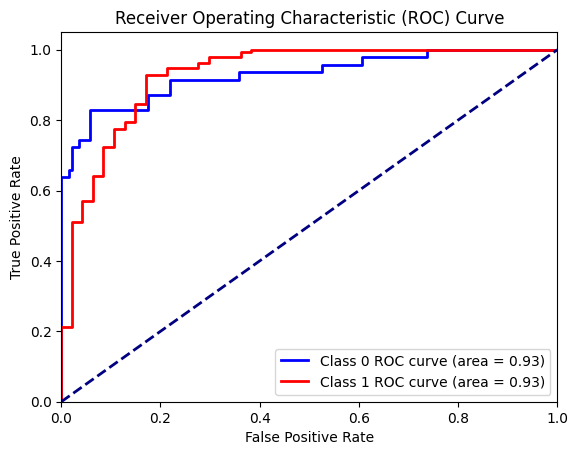

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
# Set the model to evaluation mode
import torch
import torch.nn as nn
import torchvision.models as models
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X_test and y_test are already defined as NumPy arrays
# Convert X_test and y_test to PyTorch tensors
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

model.eval()  # Set the model to evaluation mode

# Perform predictions
with torch.no_grad():
    outputs = model(X_test)  # Adjust input shape to (batch_size, channels, height, width)
    _, predicted = torch.max(outputs, 1)

# Convert predictions and true labels to numpy arrays
predicted_np = predicted.numpy()
y_test_np = y_test.numpy()

# Calculate metrics
accuracy = accuracy_score(y_test_np, predicted_np)
precision = precision_score(y_test_np, predicted_np, average='weighted')
recall = recall_score(y_test_np, predicted_np, average='weighted')
f1 = f1_score(y_test_np, predicted_np, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


# Calculate ROC curve and AUC for class 0 and class 1
fpr_0, tpr_0, _ = roc_curve(y_test_np == 0, outputs[:, 0].numpy())
roc_auc_0 = auc(fpr_0, tpr_0)

fpr_1, tpr_1, _ = roc_curve(y_test_np == 1, outputs[:, 1].numpy())
roc_auc_1 = auc(fpr_1, tpr_1)

# Plot ROC curve for class 0 and class 1
plt.figure()
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'Class 0 ROC curve (area = {roc_auc_0:.2f})')
plt.plot(fpr_1, tpr_1, color='red', lw=2, label=f'Class 1 ROC curve (area = {roc_auc_1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix

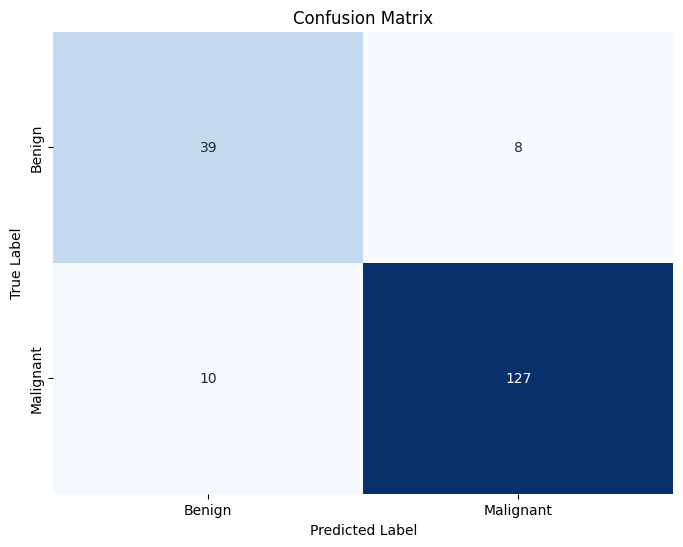

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test_np, predicted_np)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Get the name of layers

In [ ]:
import torch
import torchvision.models as models

# print all the layer names in the model
for name, layer in model.named_modules():
    if hasattr(layer, 'weight') and layer.weight is not None:
        print(f'{name} |{layer.weight.size()}')

resnet.conv1 |torch.Size([64, 3, 7, 7])
resnet.bn1 |torch.Size([64])
resnet.layer1.0.conv1 |torch.Size([64, 64, 3, 3])
resnet.layer1.0.bn1 |torch.Size([64])
resnet.layer1.0.conv2 |torch.Size([64, 64, 3, 3])
resnet.layer1.0.bn2 |torch.Size([64])
resnet.layer1.1.conv1 |torch.Size([64, 64, 3, 3])
resnet.layer1.1.bn1 |torch.Size([64])
resnet.layer1.1.conv2 |torch.Size([64, 64, 3, 3])
resnet.layer1.1.bn2 |torch.Size([64])
resnet.layer2.0.conv1 |torch.Size([128, 64, 3, 3])
resnet.layer2.0.bn1 |torch.Size([128])
resnet.layer2.0.conv2 |torch.Size([128, 128, 3, 3])
resnet.layer2.0.bn2 |torch.Size([128])
resnet.layer2.0.downsample.0 |torch.Size([128, 64, 1, 1])
resnet.layer2.0.downsample.1 |torch.Size([128])
resnet.layer2.1.conv1 |torch.Size([128, 128, 3, 3])
resnet.layer2.1.bn1 |torch.Size([128])
resnet.layer2.1.conv2 |torch.Size([128, 128, 3, 3])
resnet.layer2.1.bn2 |torch.Size([128])
resnet.layer3.0.conv1 |torch.Size([256, 128, 3, 3])
resnet.layer3.0.bn1 |torch.Size([256])
resnet.layer3.0.con

Perturbation Model

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import numpy as np
import matplotlib.pyplot as plt

# model = models.resnet18(pretrained=True)
model.eval()


def evaluate_model(model, data_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            # images = images.permute(0, 3, 1, 2)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

def perturb_and_evaluate(model, layer_name, kernel_index, std=0.1):
    layer = dict(model.named_modules())[layer_name]
    original_weight = layer.weight.data.clone()

    # 添加高斯噪声扰动到特定的kernel
    noise = torch.randn_like(layer.weight[kernel_index]) * std
    layer.weight.data[kernel_index] += noise

    # 评估模型性能
    accuracy = evaluate_model(model, test_loader)

    # 恢复原始权重
    layer.weight.data = original_weight

    return accuracy

# 假设 testX 和 testY 已经加载为 NumPy 数组
testX = X_test
testY = y_test

# # 将 testX 和 testY 转换为 PyTorch 张量
testX = torch.tensor(testX, dtype=torch.float32)
testY = torch.tensor(testY, dtype=torch.long)

# 创建数据集和数据加载器
test_dataset = torch.utils.data.TensorDataset(testX, testY)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=False)

# 选择要扰动的卷积层
layer_name = 'resnet.conv1'

# 开始评估没有扰动的准确率
original_accuracy = evaluate_model(model, test_loader)
print(f'Original Accuracy: {original_accuracy:.2f}%')

# 扰动一层中的每一个卷积核，并评估准确率
layer = dict(model.named_modules())[layer_name]
num_kernels = layer.weight.size(0)
kernel_accuracies = []

for i in range(num_kernels):
    perturbed_accuracy = perturb_and_evaluate(model, layer_name, i)
    kernel_accuracies.append((i, perturbed_accuracy))
    print(f'Kernel {i} perturbed Accuracy: {perturbed_accuracy:.2f}%')

# 找出对准确率影响最高的五个卷积核，并显示
kernel_accuracies.sort(key=lambda x: original_accuracy - x[1], reverse=True)
most_important_kernels = kernel_accuracies[:5]
print(f'Most important kernels in {layer_name}: {most_important_kernels}')


<ipython-input-17-c39f2f6bb4e7>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  testX = torch.tensor(testX, dtype=torch.float32)
<ipython-input-17-c39f2f6bb4e7>:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  testY = torch.tensor(testY, dtype=torch.long)


Original Accuracy: 88.59%
Kernel 0 perturbed Accuracy: 87.50%
Kernel 1 perturbed Accuracy: 85.87%
Kernel 2 perturbed Accuracy: 88.59%
Kernel 3 perturbed Accuracy: 66.85%
Kernel 4 perturbed Accuracy: 88.59%
Kernel 5 perturbed Accuracy: 88.59%
Kernel 6 perturbed Accuracy: 84.24%
Kernel 7 perturbed Accuracy: 88.59%
Kernel 8 perturbed Accuracy: 89.67%
Kernel 9 perturbed Accuracy: 88.59%
Kernel 10 perturbed Accuracy: 63.59%
Kernel 11 perturbed Accuracy: 85.33%
Kernel 12 perturbed Accuracy: 89.13%
Kernel 13 perturbed Accuracy: 88.59%
Kernel 14 perturbed Accuracy: 88.59%
Kernel 15 perturbed Accuracy: 88.59%
Kernel 16 perturbed Accuracy: 87.50%
Kernel 17 perturbed Accuracy: 89.13%
Kernel 18 perturbed Accuracy: 89.67%
Kernel 19 perturbed Accuracy: 50.54%
Kernel 20 perturbed Accuracy: 88.04%
Kernel 21 perturbed Accuracy: 82.61%
Kernel 22 perturbed Accuracy: 77.72%
Kernel 23 perturbed Accuracy: 85.87%
Kernel 24 perturbed Accuracy: 85.87%
Kernel 25 perturbed Accuracy: 85.87%
Kernel 26 perturbed Ac

(3, 7, 7)
30
3


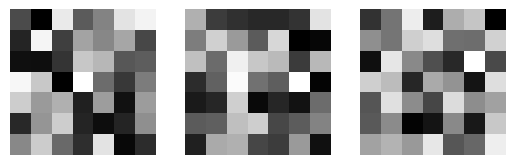

(3, 7, 7)
35
3


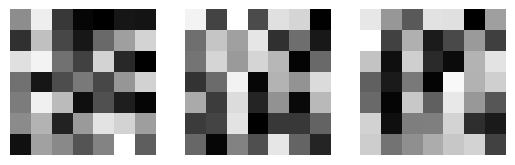

(3, 7, 7)
19
3


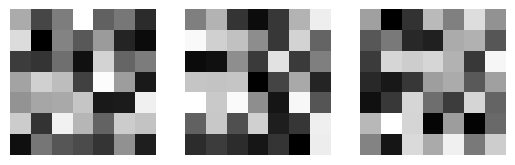

(3, 7, 7)
58
3


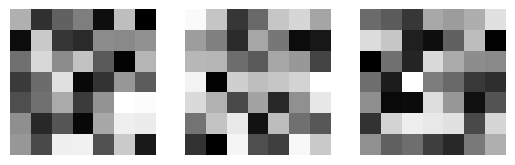

(3, 7, 7)
26
3


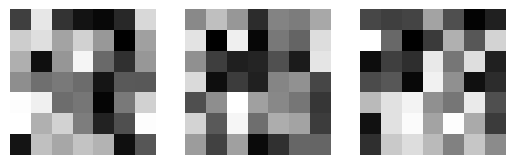

In [ ]:
# visualize the top 5 import kernel
for kernel_index, _ in most_important_kernels:
    kernel = layer.weight.data[kernel_index].cpu().numpy()
    print(kernel.shape)
    print(kernel_index)
    print(kernel.shape[0])
    plt.figure()
    for j in range(kernel.shape[0]):
        plt.subplot(1, kernel.shape[0], j+1)
        plt.imshow(kernel[j], cmap='gray')
        plt.axis('off')
    plt.show()

Three classification data processing

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import os
import pandas as pd

directory_path = "/content/gdrive/MyDrive/unet-roi/"

images = []
file_names_list = []

for file_name in file_names:

    file_path = os.path.join(directory_path, file_name)
    try:

        img = Image.open(file_path)

        img_array = np.array(img)
        images.append(img_array)

        file_names_list.append(file_name)
    except FileNotFoundError:
        print(f"File {file_path} not found. Skipping this file.")

images = np.array(images)


y = new_df.set_index('FileName').loc[file_names_list]['Texture'].values #Texture

X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.2, random_state=42)

X_train = np.array(X_train, dtype=np.uint8)
X_test = np.array(X_test, dtype=np.uint8)
y_train = np.array(y_train, dtype=np.uint8)
y_test = np.array(y_test, dtype=np.uint8)

np.save('trainX.npy', X_train)
np.save('testX.npy', X_test)
np.save('trainY1.npy', y_train)
np.save('testY1.npy', y_test)

print("Images and Malignancy values have been saved to 'train.npy', 'test.npy', 'trainY.npy', and 'testY.npy'.")

Images and Malignancy values have been saved to 'train.npy', 'test.npy', 'trainY.npy', and 'testY.npy'.


Three classification train

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

class ResNet2D(nn.Module):
    def __init__(self, num_classes):
        super(ResNet2D, self).__init__()
        self.resnet = models.resnet18(pretrained=True)
        self.resnet.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.resnet.fc = nn.Sequential(
            nn.Linear(self.resnet.fc.in_features, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = x.permute(0, 3, 1, 2)
        x = self.resnet.conv1(x)
        x = self.resnet.bn1(x)
        x = self.resnet.relu(x)
        x = self.resnet.maxpool(x)

        x = self.resnet.layer1(x)
        x = self.resnet.layer2(x)
        x = self.resnet.layer3(x)
        x = self.resnet.layer4(x)

        x = self.resnet.avgpool(x)
        x = torch.flatten(x, 1)

        out = self.resnet.fc(x)

        return out

# 实例化改进后的模型
model = ResNet2D(num_classes=3)

# 假设 trainX 和 trainY 已经加载为 NumPy 数组
# 将 trainX 和 trainY 转换为 PyTorch 张量
# trainX = torch.tensor(np.random.rand(100, 64, 64, 3), dtype=torch.float32) # Dummy data for example
# trainY = torch.tensor(np.random.randint(0, 3, size=(100)), dtype=torch.long) # Dummy data for example
trainX = torch.tensor(X_train, dtype=torch.float32) # Dummy data for example
trainY = torch.tensor(y_train, dtype=torch.long) # Dummy data for example
# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
# 训练循环
num_epochs = 25  # 你可以根据需要调整
correct = 0
total = 0
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    model.train()  # 设置模型为训练模式
    optimizer.zero_grad()  # 清除梯度

    outputs = model(trainX)  # 前向传播
    loss = criterion(outputs, trainY)  # 计算损失

    loss.backward()  # 反向传播
    optimizer.step()  # 更新参数

    _, predicted = torch.max(outputs.data, 1)
    accuracy = accuracy_score(trainY.numpy(), predicted.numpy())



    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}, Accuracy: {accuracy:.4f}')
    loss_list.append(loss.item())
    acc_list.append(accuracy)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/25], Loss: 1.4763587713241577, Accuracy: 0.1569
Epoch [2/25], Loss: 0.7098998427391052, Accuracy: 0.7422
Epoch [3/25], Loss: 0.46611687541007996, Accuracy: 0.8049
Epoch [4/25], Loss: 0.29849162697792053, Accuracy: 0.8622
Epoch [5/25], Loss: 0.16972698271274567, Accuracy: 0.9495
Epoch [6/25], Loss: 0.0960867777466774, Accuracy: 0.9877
Epoch [7/25], Loss: 0.046459686011075974, Accuracy: 0.9973
Epoch [8/25], Loss: 0.024037130177021027, Accuracy: 1.0000
Epoch [9/25], Loss: 0.011438209563493729, Accuracy: 1.0000
Epoch [10/25], Loss: 0.006827458739280701, Accuracy: 1.0000
Epoch [11/25], Loss: 0.0050207702443003654, Accuracy: 1.0000
Epoch [12/25], Loss: 0.002673062961548567, Accuracy: 1.0000
Epoch [13/25], Loss: 0.002208870369940996, Accuracy: 1.0000
Epoch [14/25], Loss: 0.0013104183599352837, Accuracy: 1.0000
Epoch [15/25], Loss: 0.0010189892491325736, Accuracy: 1.0000
Epoch [16/25], Loss: 0.0007069967687129974, Accuracy: 1.0000
Epoch [17/25], Loss: 0.000607011781539768, Accuracy: 1

Three classification train plot

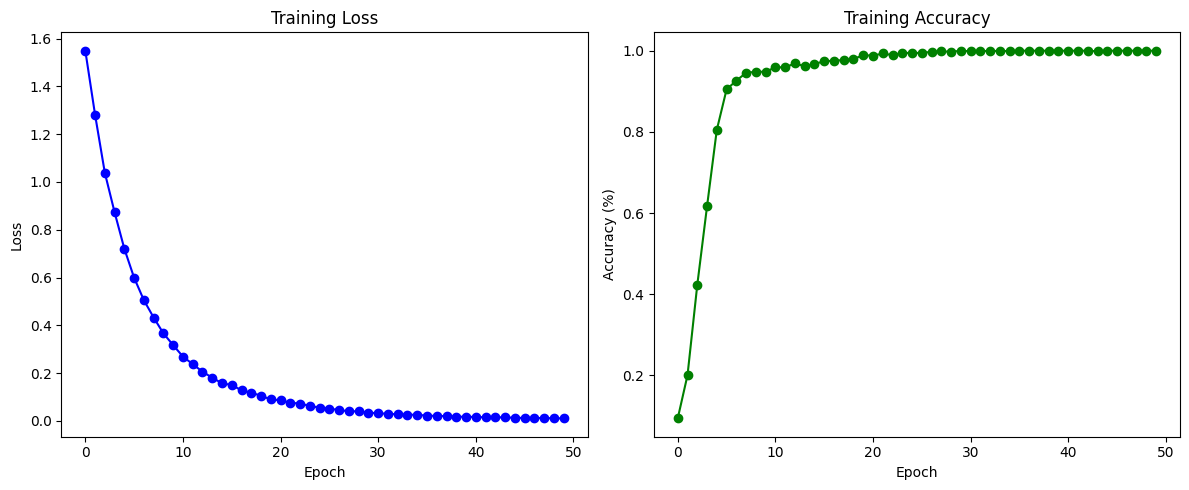

In [ ]:
import matplotlib.pyplot as plt

# Assuming loss_list and accuracy_list are lists containing the loss and accuracy values for each epoch
# For demonstration purposes, let's create some dummy data
epochs = 25

accuracy_list = acc_list

# Plotting the training loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss_list, marker='o', color='b')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plotting the training accuracy
plt.subplot(1, 2, 2)
plt.plot(range(epochs), accuracy_list, marker='o', color='g')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

# Display the plots
plt.tight_layout()
plt.show()

**ROC Curve & metrics**

<ipython-input-216-927178b14436>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
<ipython-input-216-927178b14436>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.long)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Accuracy: 0.7989
Precision: 0.8501
Recall: 0.7989
F1 Score: 0.8099


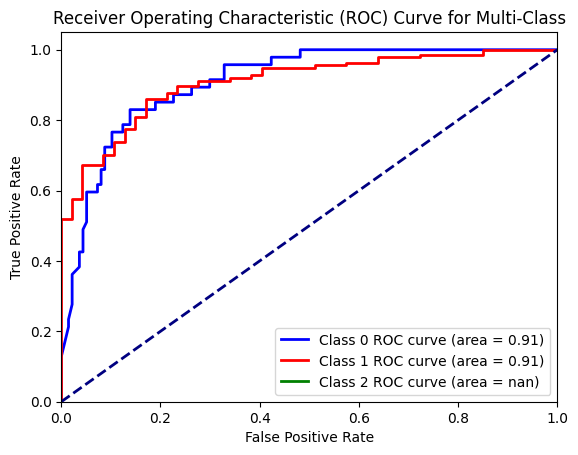

In [ ]:
# Set the model to evaluation mode
model.eval()

# Perform predictions and get probabilities for ROC curve
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)
with torch.no_grad():
    outputs = model(X_test)
    probabilities = torch.softmax(outputs, dim=1)  # Get probabilities for each class

# Convert predictions and true labels to numpy arrays
probabilities_np = probabilities.numpy()
trainY_np = y_test.numpy()

# Calculate metrics
predicted_np = np.argmax(probabilities_np, axis=1)
accuracy = accuracy_score(trainY_np, predicted_np)
precision = precision_score(trainY_np, predicted_np, average='weighted')
recall = recall_score(trainY_np, predicted_np, average='weighted')
f1 = f1_score(trainY_np, predicted_np, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Binarize the output labels for ROC curve calculation
trainY_bin = label_binarize(trainY_np, classes=[0, 1, 2])

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(trainY_bin[:, i], probabilities_np[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc="lower right")
plt.show()


Confusion Matrix

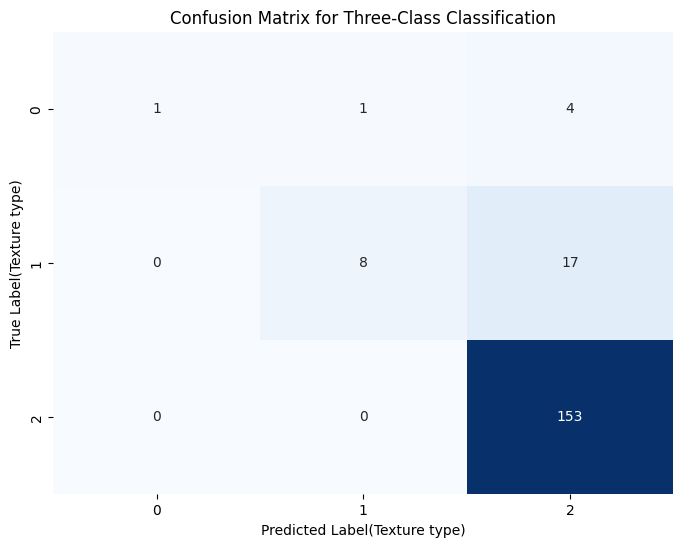

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming trainY_np and predicted_np are already defined as NumPy arrays for three classes

# Calculate confusion matrix for three classes
cm = confusion_matrix(trainY_np, predicted_np)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label(Texture type)')
plt.ylabel('True Label(Texture type)')
plt.title('Confusion Matrix for Three-Class Classification')
plt.show()


Tensor flow CNN train

In [ ]:
model = create_larger_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1000, validation_data=(X_test, y_test))

# save the model
model.save('malignancy_model.h5')

print("Model training complete and saved as 'malignancy_model.h5'.")

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.0532 - loss: nan - val_accuracy: 0.0326 - val_loss: nan
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.0532 - loss: nan - val_accuracy: 0.0326 - val_loss: nan
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.0532 - loss: nan - val_accuracy: 0.0326 - val_loss: nan
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.0532 - loss: nan - val_accuracy: 0.0326 - val_loss: nan
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.0532 - loss: nan - val_accuracy: 0.0326 - val_loss: nan
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.0532 - loss: nan - val_accuracy: 0.0326 - val_loss: nan
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.0532 - loss: nan - val_accuracy: 0.0326 - val_loss: nan
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.0532 - loss: nan - val_accuracy: 0.0326 - val_loss: nan
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━

Model training complete and saved as 'malignancy_model.h5'.


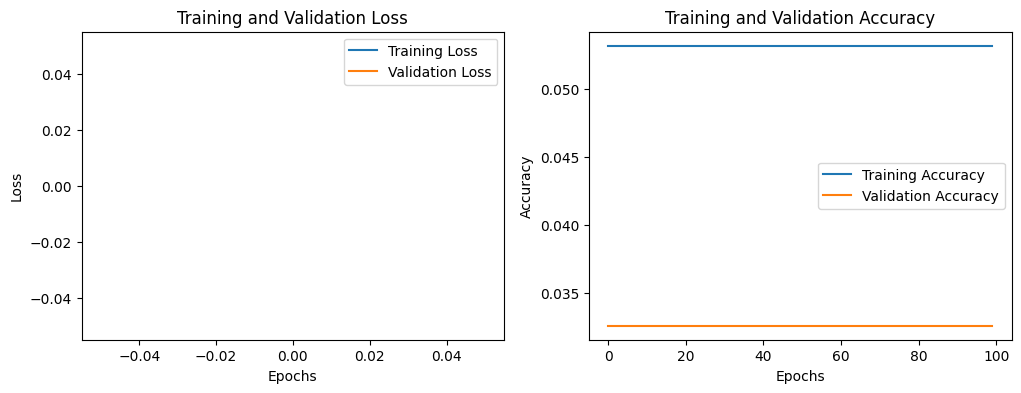

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Two-class and three-class classification training

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import os
import pandas as pd

# 图像文件所在的目录路径
directory_path = "/content/gdrive/MyDrive/unet-roi/"

# 创建一个空列表来存储图像数据和文件名
images = []
file_names_list = []

# 遍历文件名列表并读取图像
for file_name in file_names:
    # 构建完整的文件路径
    file_path = os.path.join(directory_path, file_name)
    try:
        # 打开图像并调整大小为64x64
        img = Image.open(file_path)
        # 将图像转换为numpy数组并归一化到0-1范围
        img_array = np.array(img)
        images.append(img_array)
        # 将文件名添加到列表中
        file_names_list.append(file_name)
    except FileNotFoundError:
        print(f"File {file_path} not found. Skipping this file.")

# 将图像数据转换为numpy数组
images = np.array(images)


# 提取 Malignancy 列作为预测值，并确保顺序与图像数据一致
y = new_df.set_index('FileName').loc[file_names_list][['Texture', 'Malignancy']].values
print(y.shape)
# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.2, random_state=42)

y_train_malignancy = y_train[:, 1].reshape(-1, 1)
y_train_texture = y_train[:, 0].reshape(-1, 1)

y_test_malignancy = y_test[:, 1].reshape(-1, 1)
y_test_texture = y_test[:, 0].reshape(-1, 1)

X_train = np.array(X_train, dtype=np.uint8)
X_test = np.array(X_test, dtype=np.uint8)
y_train_malignancy = np.array(y_train_malignancy, dtype=np.uint8)
y_train_texture = np.array(y_train_texture, dtype=np.uint8)
y_test_malignancy = np.array(y_test_malignancy, dtype=np.uint8)
y_test_texture = np.array(y_test_texture, dtype=np.uint8)

# print(y_train_malignancy)
# print(y_train_texture)
# # 保存训练集和测试集到npy文件
# np.save('trainX.npy', X_train)
# np.save('testX.npy', X_test)
# np.save('trainY1.npy', y_train)
# np.save('testY1.npy', y_test)

print("Images and Malignancy values have been saved to 'train.npy', 'test.npy', 'trainY.npy', and 'testY.npy'.")

(917, 2)
[[0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

class ImprovedResNet2D(nn.Module):
    def __init__(self, num_classes_malignancy, num_classes_texture):
        super(ImprovedResNet2D, self).__init__()
        self.resnet = models.resnet18(pretrained=True)  # 使用ResNet-18以减少计算量
        self.resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

        # 定义两个全连接层分别用于malignancy和texture
        self.fc_malignancy = nn.Sequential(
            nn.Linear(self.resnet.fc.in_features, 256),  # 减少全连接层的大小
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes_malignancy)
        )
        self.fc_texture = nn.Sequential(
            nn.Linear(self.resnet.fc.in_features, 256),  # 减少全连接层的大小
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes_texture)
        )

    def forward(self, x):

        x = self.resnet.bn1(x)
        x = self.resnet.relu(x)
        x = self.resnet.maxpool(x)

        x = self.resnet.layer1(x)
        x = self.resnet.layer2(x)
        x = self.resnet.layer3(x)
        x = self.resnet.layer4(x)

        x = self.resnet.avgpool(x)
        x = torch.flatten(x, 1)

        out_malignancy = self.fc_malignancy(x)
        out_texture = self.fc_texture(x)

        return out_malignancy, out_texture

# 实例化改进后的模型
model = ImprovedResNet2D(num_classes_malignancy=2, num_classes_texture=3)

# 假设 trainX 和 trainY 已经加载为 NumPy 数组

trainX = torch.tensor(X_train, dtype=torch.float32)
trainY_malignancy = torch.tensor(y_train_malignancy.flatten(), dtype=torch.long)
trainY_texture = torch.tensor(y_train_texture.flatten(), dtype=torch.long)

# 定义损失函数和优化器
criterion_malignancy = nn.CrossEntropyLoss()
criterion_texture = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# 训练循环
num_epochs = 30  # 你可以根据需要调整
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    model.train()  # 设置模型为训练模式
    optimizer.zero_grad()  # 清除梯度

    outputs_malignancy, outputs_texture = model(trainX)  # 前向传播
    loss_malignancy = criterion_malignancy(outputs_malignancy, trainY_malignancy)  # 计算损失
    loss_texture = criterion_texture(outputs_texture, trainY_texture)  # 计算损失

    loss = loss_malignancy + loss_texture  # 总损失

    loss.backward()  # 反向传播
    optimizer.step()  # 更新参数

    _, predicted_malignancy = torch.max(outputs_malignancy.data, 1)
    _, predicted_texture = torch.max(outputs_texture.data, 1)

    accuracy_malignancy = accuracy_score(trainY_malignancy.numpy(), predicted_malignancy.numpy())
    accuracy_texture = accuracy_score(trainY_texture.numpy(), predicted_texture.numpy())

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}, Malignancy Accuracy: {accuracy_malignancy:.4f}, Texture Accuracy: {accuracy_texture:.4f}')
    loss_list.append(loss.item())
    acc_list.append((accuracy_malignancy, accuracy_texture))


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 1.7459161281585693, Malignancy Accuracy: 0.4966, Texture Accuracy: 0.5061
Epoch [2/30], Loss: 1.1582489013671875, Malignancy Accuracy: 0.7312, Texture Accuracy: 0.8377
Epoch [3/30], Loss: 0.8979225158691406, Malignancy Accuracy: 0.7326, Texture Accuracy: 0.8377
Epoch [4/30], Loss: 0.6702694892883301, Malignancy Accuracy: 0.8158, Texture Accuracy: 0.8390
Epoch [5/30], Loss: 0.533200204372406, Malignancy Accuracy: 0.9168, Texture Accuracy: 0.8431
Epoch [6/30], Loss: 0.3931213617324829, Malignancy Accuracy: 0.9754, Texture Accuracy: 0.8636
Epoch [7/30], Loss: 0.28892070055007935, Malignancy Accuracy: 0.9850, Texture Accuracy: 0.8909
Epoch [8/30], Loss: 0.20724216103553772, Malignancy Accuracy: 0.9918, Texture Accuracy: 0.9372
Epoch [9/30], Loss: 0.1596290022134781, Malignancy Accuracy: 0.9959, Texture Accuracy: 0.9509
Epoch [10/30], Loss: 0.1193523108959198, Malignancy Accuracy: 0.9959, Texture Accuracy: 0.9632
Epoch [11/30], Loss: 0.08808327466249466, Malignancy Accur

Result

In [ ]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_malignancy_tensor = torch.tensor(y_test_malignancy.flatten(), dtype=torch.long)
y_test_texture_tensor = torch.tensor(y_test_texture.flatten(), dtype=torch.long)

# 设置模型为评估模式
model.eval()

# 执行预测
with torch.no_grad():
    outputs_malignancy, outputs_texture = model(X_test_tensor)

# 获取预测结果
_, predicted_malignancy = torch.max(outputs_malignancy.data, 1)
_, predicted_texture = torch.max(outputs_texture.data, 1)

# 转换预测结果和真实标签为 NumPy 数组
predicted_malignancy_np = predicted_malignancy.numpy()
predicted_texture_np = predicted_texture.numpy()
y_test_malignancy_np = y_test_malignancy_tensor.numpy()
y_test_texture_np = y_test_texture_tensor.numpy()

# 计算评估指标
accuracy_malignancy = accuracy_score(y_test_malignancy_np, predicted_malignancy_np)
precision_malignancy = precision_score(y_test_malignancy_np, predicted_malignancy_np, average='weighted')
recall_malignancy = recall_score(y_test_malignancy_np, predicted_malignancy_np, average='weighted')
f1_malignancy = f1_score(y_test_malignancy_np, predicted_malignancy_np, average='weighted')

accuracy_texture = accuracy_score(y_test_texture_np, predicted_texture_np)
precision_texture = precision_score(y_test_texture_np, predicted_texture_np, average='weighted')
recall_texture = recall_score(y_test_texture_np, predicted_texture_np, average='weighted')
f1_texture = f1_score(y_test_texture_np, predicted_texture_np, average='weighted')

print(f'Malignancy - Accuracy: {accuracy_malignancy:.4f}, Precision: {precision_malignancy:.4f}, Recall: {recall_malignancy:.4f}, F1 Score: {f1_malignancy:.4f}')
print(f'Texture - Accuracy: {accuracy_texture:.4f}, Precision: {precision_texture:.4f}, Recall: {recall_texture:.4f}, F1 Score: {f1_texture:.4f}')

Malignancy - Accuracy: 0.8315, Precision: 0.8241, Recall: 0.8315, F1 Score: 0.8253
Texture - Accuracy: 0.8641, Precision: 0.8624, Recall: 0.8641, F1 Score: 0.8631


ROC curve

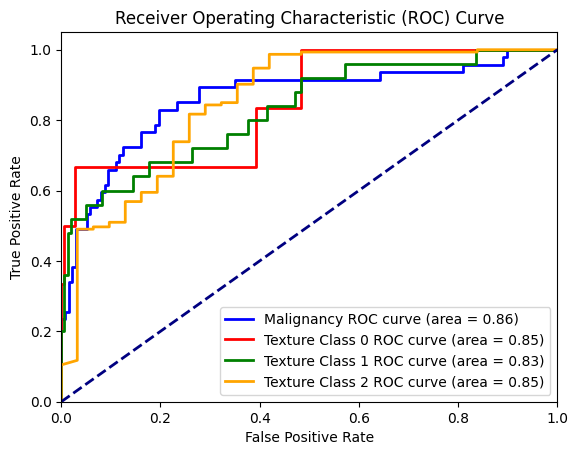

In [ ]:
model.eval()

with torch.no_grad():
    outputs_malignancy, outputs_texture = model(X_test_tensor)
    probabilities_malignancy = torch.softmax(outputs_malignancy, dim=1)
    probabilities_texture = torch.softmax(outputs_texture, dim=1)

probabilities_malignancy_np = probabilities_malignancy.numpy()
probabilities_texture_np = probabilities_texture.numpy()
y_test_malignancy_np = y_test_malignancy_tensor.numpy()
y_test_texture_np = y_test_texture_tensor.numpy()

# Binarize the output labels for ROC curve calculation
y_test_malignancy_bin = label_binarize(y_test_malignancy_np, classes=[0, 1])
y_test_texture_bin = label_binarize(y_test_texture_np, classes=[0, 1, 2])

# Calculate ROC curve and AUC for each class (malignancy and texture)
tpr_malignancy,fpr_malignancy, _ = roc_curve(y_test_malignancy_bin[:, 0], probabilities_malignancy_np[:, 0])
roc_auc_malignancy = auc(fpr_malignancy, tpr_malignancy)

fpr_texture = dict()
tpr_texture = dict()
roc_auc_texture = dict()
for i in range(3):
    fpr_texture[i], tpr_texture[i], _ = roc_curve(y_test_texture_bin[:, i], probabilities_texture_np[:, i])
    roc_auc_texture[i] = auc(fpr_texture[i], tpr_texture[i])

# Plot ROC curve for malignancy and texture classes
plt.figure()
plt.plot(fpr_malignancy, tpr_malignancy, color='blue', lw=2, label=f'Malignancy ROC curve (area = {roc_auc_malignancy:.2f})')
colors = ['red', 'green', 'orange']
for i in range(3):
    plt.plot(fpr_texture[i], tpr_texture[i], color=colors[i], lw=2, label=f'Texture Class {i} ROC curve (area = {roc_auc_texture[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix

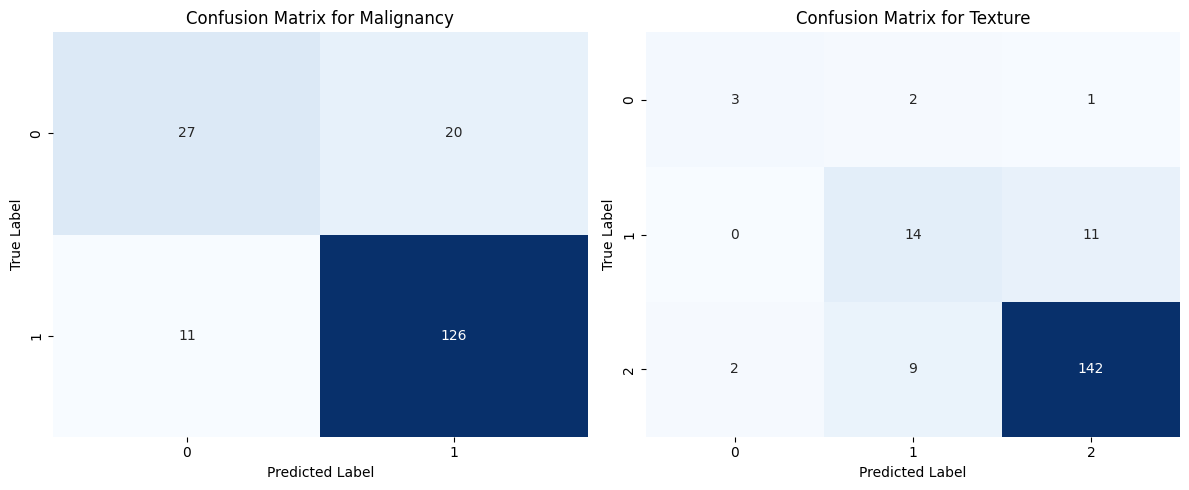

In [ ]:
model.eval()

with torch.no_grad():
    outputs_malignancy, outputs_texture = model(X_test_tensor)

_, predicted_malignancy = torch.max(outputs_malignancy.data, 1)
_, predicted_texture = torch.max(outputs_texture.data, 1)

predicted_malignancy_np = predicted_malignancy.numpy()
predicted_texture_np = predicted_texture.numpy()
y_test_malignancy_np = y_test_malignancy_tensor.numpy()
y_test_texture_np = y_test_texture_tensor.numpy()

cm_malignancy = confusion_matrix(y_test_malignancy_np, predicted_malignancy_np)
cm_texture = confusion_matrix(y_test_texture_np, predicted_texture_np)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_malignancy, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Malignancy')

plt.subplot(1, 2, 2)
sns.heatmap(cm_texture, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Texture')

plt.tight_layout()
plt.show()